### 필수과제2
- 1. label의 따라서 긍정, 부정일텐데 긍정의 리뷰와 부정의 리뷰에 가장 많은 빈도 단어들은 어떤 것이 있는지? 만들어 주세요!
- 문자열 split 리스트에 넣어서 해도 되고 확인해 주세요!

- 2. 리뷰의 길이에 따른 긍정과 부정, 가장 많은 빈도의 단어는 어떤 것이 있는지 확인해 주세요!

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('movie_rv.csv')

In [3]:
df.head()

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
#긍정적인 댓글만 뽑아내기
df_positive= df[df['label']==1]
df_positive

,Unnamed: 0,id,document,label
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
8,8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1
10,10,9008700,걍인피니트가짱이다.진짜짱이다♥,1
...,...,...,...,...
149991,149991,9492905,http://blog.naver.com/oroblast/220215679580 나쁜...,1
149993,149993,10020916,For Carl.칼 세이건으로 시작해서 칼 세이건으로 끝난다.,1
149994,149994,9458520,디케이드 다음에 더블 다음에 오즈인데 더블은 조금밖에 안나오네요.,1
149996,149996,8549745,평점이 너무 낮아서...,1


In [5]:
#부정적인 댓글
df_negative= df[df['label']==0]
df_negative

,Unnamed: 0,id,document,label
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
2,2,10265843,너무재밓었다그래서보는것을추천한다,0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
5,5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
...,...,...,...,...
149990,149990,6373651,이걸 영화라고 찎었냐?,0
149992,149992,9335962,공포나 재난영화가 아니라 아예 대놓고 비급 크리쳐개그물임ㅋㅋ 음악 완전 흥겹다ㅋ 5...,0
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0


In [11]:
df['label'].value_counts()

0    75173
1    74827
Name: label, dtype: int64

In [12]:
df['document_len'] = df['document'].str.len()

In [16]:
from collections import Counter

def word_frequency(text):
    text = text.astype(str) # 문자열로 변환
    all_text = ' '.join(text) # 모든 값 하나의 문자열로 합침
    words = all_text.split() # 공백을 기준으로 나눔
    word_counts = Counter(words) # words에 있는 각 단어의 빈도 계산 (words_count = 딕셔너리)
    df_word_counts = pd.DataFrame.from_dict(word_counts, orient='index', columns=['Frequency']) # 딕셔너리를 데이터프레임으로 변환
    df_word_counts = df_word_counts.sort_values(by='Frequency', ascending=False) # 내림차순 정렬
    return df_word_counts

In [15]:
result = word_frequency(df['document'])
result.head(20)

,Frequency
영화,10825
너무,8239
정말,7791
진짜,5929
이,5059
영화.,3598
왜,3285
더,3260
이런,3249
그냥,3237


- 긍정적 리뷰와 부정적 리뷰 모두 `영화`라는 단어가 가장 많이 나타남

In [21]:
pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   -------- ------------------------------- 61.4/300.2 kB 1.7 MB/s eta 0:00:01
   ------------------------------ --------- 225.3/300.2 kB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


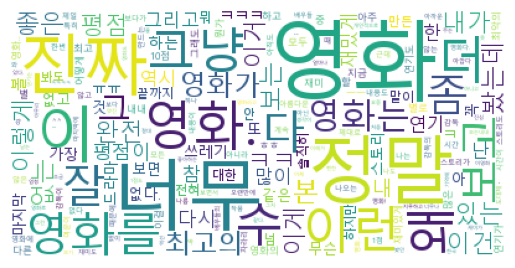

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       background_color='white').generate_from_frequencies(result.to_dict()['Frequency'])
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### 2. 리뷰의 길이에 따른 긍정과 부정, 자주 등장하는 단어 파악

In [41]:
df['length'] = df.document.str.len()
df

,Unnamed: 0,id,document,label,document_len,length
0,0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,19.0,19.0
1,1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,33.0,33.0
2,2,10265843,너무재밓었다그래서보는것을추천한다,0,17.0,17.0
3,3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,29.0,29.0
4,4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,61.0,61.0
...,...,...,...,...,...,...
149995,149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0,19.0,19.0
149996,149996,8549745,평점이 너무 낮아서...,1,13.0,13.0
149997,149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0,31.0,31.0
149998,149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1,27.0,27.0


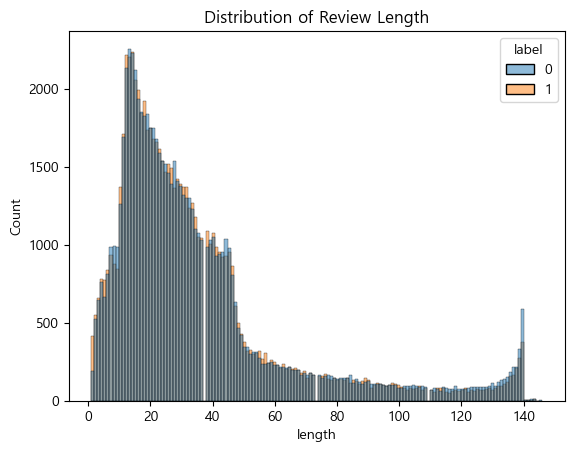

In [42]:
import seaborn as sns

sns.histplot(data=df, x='length', hue='label')
plt.title("Distribution of Review Length")
plt.show()

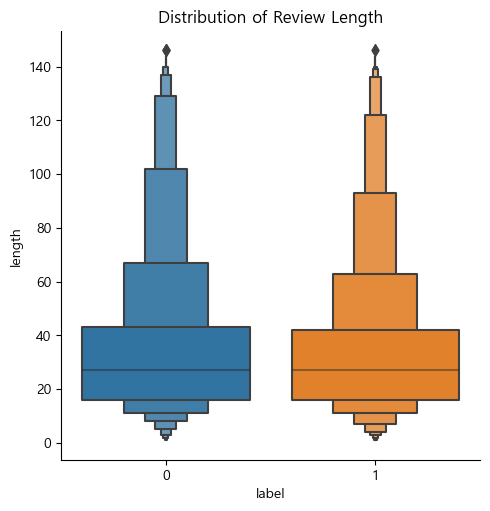

In [43]:
sns.catplot(data=df, x='label', y='length', kind='boxen')
plt.title("Distribution of Review Length")
plt.show()

- 긍정적 리뷰와 부정적 리뷰 모두 비슷한 길이의 분포를 가짐